In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression

In [2]:
table = pd.read_csv(r'C:\Users\owner\projects\table_8.csv', encoding='ISO-8859-1')

In [3]:
fbi = table.drop([0, 1, 2, 3])
fbi.columns = ['City', 'Population', 'Violent_crime', 'Murder and nonnegligent manslaughter', 'Rape(revised definition)', 'Rape','Robbery', 'Aggrevated_assault', 'Property_crime', 'Buglary', 'Larceny_theft', 'Motor-vehicle theft', 'Arson', 'blank']

In [4]:
fbi_new= fbi.drop(columns = ['blank'])
fbi_new.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape(revised definition),Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,"1,861",0,0,NaN,0,0,0,12,2,10,0,0
5,Addison Town and Village,"2,577",3,0,NaN,0,0,3,24,3,20,1,0
6,Akron Village,"2,846",3,0,NaN,0,0,3,16,1,15,0,0
7,Albany,"97,956",791,8,NaN,30,227,526,"4,090",705,"3,243",142,NaN
8,Albion Village,"6,388",23,0,NaN,3,4,16,223,53,165,5,NaN


In [5]:
fbi_new.dtypes

City                                    object
Population                              object
Violent_crime                           object
Murder and nonnegligent manslaughter    object
Rape(revised definition)                object
Rape                                    object
Robbery                                 object
Aggrevated_assault                      object
Property_crime                          object
Buglary                                 object
Larceny_theft                           object
Motor-vehicle theft                     object
Arson                                   object
dtype: object

In [6]:
# determined that the entire column is nan and dropped it
np.unique(fbi_new['Rape(revised definition)'])
fbi_new= fbi_new.drop(columns = ['Rape(revised definition)'])

In [7]:
fbi_new['Violent_crime'] = pd.to_numeric(fbi_new['Violent_crime'], errors='coerce')
fbi_new['Murder and nonnegligent manslaughter'] = pd.to_numeric(fbi_new['Murder and nonnegligent manslaughter'], errors='coerce')
fbi_new['Rape'] = pd.to_numeric(fbi_new['Rape'], errors='coerce')
fbi_new['Robbery'] = pd.to_numeric(fbi_new['Robbery'], errors='coerce')
fbi_new['Aggrevated_assault'] = pd.to_numeric(fbi_new['Aggrevated_assault'], errors='coerce')
fbi_new['Property_crime'] = pd.to_numeric(fbi_new['Property_crime'], errors='coerce')
fbi_new['Buglary'] = pd.to_numeric(fbi_new['Buglary'], errors='coerce')
fbi_new['Larceny_theft'] = pd.to_numeric(fbi_new['Larceny_theft'], errors='coerce')
fbi_new['Motor-vehicle theft'] = pd.to_numeric(fbi_new['Motor-vehicle theft'], errors='coerce')
fbi_new['Arson'] = pd.to_numeric(fbi_new['Arson'], errors='coerce')

In [8]:
fbi_new.dtypes

City                                     object
Population                               object
Violent_crime                           float64
Murder and nonnegligent manslaughter    float64
Rape                                    float64
Robbery                                 float64
Aggrevated_assault                      float64
Property_crime                          float64
Buglary                                 float64
Larceny_theft                           float64
Motor-vehicle theft                     float64
Arson                                   float64
dtype: object

In [9]:
#removing the commas
fbi_new.Population = fbi_new.Population.str.replace(',', '')

In [10]:
fbi_new['Population'] = pd.to_numeric(fbi_new['Population'], errors='coerce')

In [11]:
#remove the data that was falsely included in the dataframe
fbi_new = fbi_new[fbi_new.Population.isnull() ==False]

In [12]:
fbi_new.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,10.0,0.0,0.0
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.0,3.0,20.0,1.0,0.0
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.0,1.0,15.0,0.0,0.0
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,NaN,705.0,NaN,142.0,NaN
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.0,53.0,165.0,5.0,NaN


In [13]:
fbi_new.rename(columns={'Murder and nonnegligent manslaughter':'Murder'}, inplace = True)

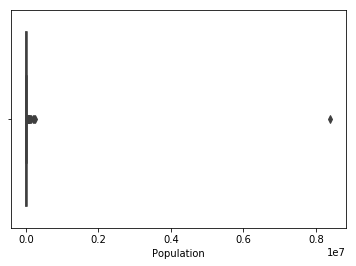

In [14]:
sns.boxplot(fbi_new.Population)

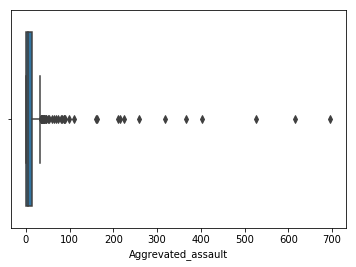

In [15]:
sns.boxplot(fbi_new.Aggrevated_assault)

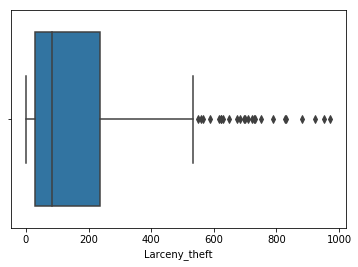

In [16]:
sns.boxplot(fbi_new.Larceny_theft)

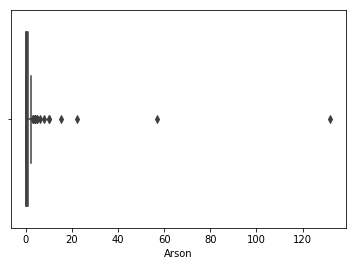

In [17]:
sns.boxplot(fbi_new.Arson)

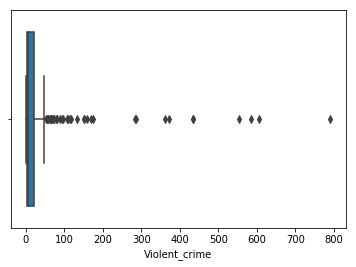

In [18]:
sns.boxplot(fbi_new.Violent_crime)

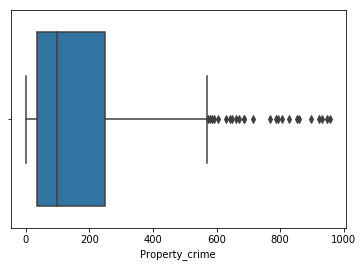

In [19]:
sns.boxplot(fbi_new.Property_crime)

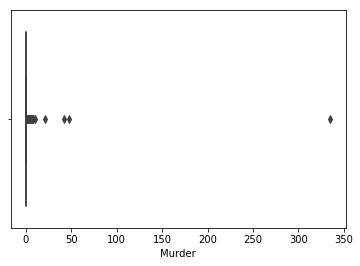

In [20]:
sns.boxplot(fbi_new.Murder)

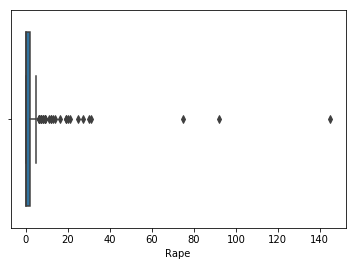

In [21]:
sns.boxplot(fbi_new.Rape)

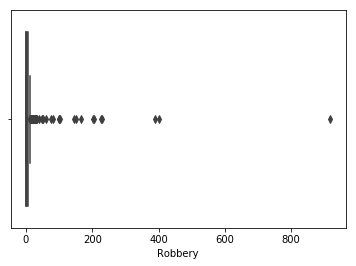

In [22]:
sns.boxplot(fbi_new.Robbery)

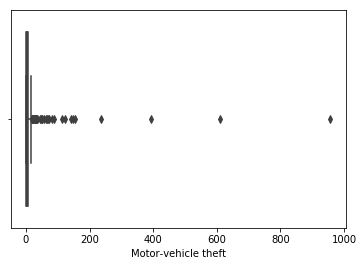

In [23]:
sns.boxplot(fbi_new['Motor-vehicle theft'])

In [24]:
#filled nans with the mean
fbi_new.fillna(fbi_new.mean(), inplace = True)

In [25]:
# removing outliers

#fbi_new = fbi_new.loc[(fbi_new['Property_crime'] <=500)& (fbi_new['Aggrevated_assault'] <150) &(fbi_new['Larceny_theft'] <500)&(fbi_new['Arson'] <5) & (fbi_new['Violent_crime'] < 50) & (fbi_new['Murder'] <10) & (fbi_new['Rape'] <40) & (fbi_new['Robbery'] < 300) & (fbi_new['Motor-vehicle theft'] <200)]

In [26]:
fbi_new.head()

,City,Population,Violent_crime,Murder,Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson
4,Adams Village,1861.0,0.0,0.0,0.0,0.0,0.0,12.000000,2.0,10.000000,0.0,0.000000
5,Addison Town and Village,2577.0,3.0,0.0,0.0,0.0,3.0,24.000000,3.0,20.000000,1.0,0.000000
6,Akron Village,2846.0,3.0,0.0,0.0,0.0,3.0,16.000000,1.0,15.000000,0.0,0.000000
7,Albany,97956.0,791.0,8.0,30.0,227.0,526.0,183.918239,705.0,167.944785,142.0,1.871658
8,Albion Village,6388.0,23.0,0.0,3.0,4.0,16.0,223.000000,53.0,165.000000,5.0,1.871658


In [27]:
#sns.distplot(fbi_new.Robbery, bins = 5)

In [28]:
features = pd.DataFrame(fbi_new.Population)
features['Population_sqrd'] = features['Population'] ** 2
features['Murder'] = np.where(fbi_new['Murder'] >0, 1,0) 
features['Robbery'] = np.where(fbi_new['Robbery'] >0, 1,0) 
features['Property_crime'] = fbi_new['Property_crime']

In [29]:
features.head()

,Population,Population_sqrd,Murder,Robbery,Property_crime
4,1861.0,3.463321e+06,0,0,12.000000
5,2577.0,6.640929e+06,0,0,24.000000
6,2846.0,8.099716e+06,0,0,16.000000
7,97956.0,9.595378e+09,1,1,183.918239
8,6388.0,4.080654e+07,0,1,223.000000


In [30]:
regr = linear_model.LinearRegression()
Y = features['Property_crime'].values.reshape(-1, 1)
X = features[['Population', 'Population_sqrd', 'Murder', 'Robbery']]
regr.fit(X, Y)

print('\nCoeffiicients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))


Coeffiicients: 
 [[ 1.82166185e-04 -2.43379817e-11  1.28613078e+02  1.94038971e+02]]

Intercept: 
 [46.93463373]

R-squared:
0.34041015862890944


# Creation of New Features

In [31]:
features_new = pd.DataFrame(fbi_new.Population)
features_new['Property_crime_per_capita'] = fbi_new['Property_crime'] /fbi_new['Population']
features_new['Larceny_per_capita'] = fbi_new['Larceny_theft'] / fbi_new['Population']
features_new['Buglary_per_capita'] = fbi_new['Buglary'] / fbi_new['Population']
features_new['Violent_crime_per_capita'] = fbi_new['Violent_crime'] / fbi_new['Population']
features_new['Vehicle_theft_per_capita'] = fbi_new['Motor-vehicle theft'] / fbi_new['Population']
features_new['Arson_per_capita'] = fbi_new['Arson']  / fbi_new['Population']
features_new['Aggrevated_assault_per_capita'] = fbi_new['Aggrevated_assault'] / fbi_new['Population']
features_new['Rape_per_capita'] = fbi_new['Rape'] / fbi_new['Population']

In [32]:
features_new.corr()

,Population,Property_crime_per_capita,Larceny_per_capita,Buglary_per_capita,Violent_crime_per_capita,Vehicle_theft_per_capita,Arson_per_capita,Aggrevated_assault_per_capita,Rape_per_capita
Population,1.000000,-0.077448,-0.074871,-0.057987,-0.031947,-0.014345,-0.046962,-0.030283,-0.016613
Property_crime_per_capita,-0.077448,1.000000,0.957260,0.604544,0.269117,0.217130,0.315074,0.263281,0.293247
Larceny_per_capita,-0.074871,0.957260,1.000000,0.567194,0.302314,0.231567,0.287803,0.284747,0.316379
Buglary_per_capita,-0.057987,0.604544,0.567194,1.000000,0.681289,0.409274,0.263320,0.641645,0.427849
Violent_crime_per_capita,-0.031947,0.269117,0.302314,0.681289,1.000000,0.423320,0.120777,0.939125,0.555703
Vehicle_theft_per_capita,-0.014345,0.217130,0.231567,0.409274,0.423320,1.000000,0.105357,0.409776,0.265596
Arson_per_capita,-0.046962,0.315074,0.287803,0.263320,0.120777,0.105357,1.000000,0.160751,0.143939
Aggrevated_assault_per_capita,-0.030283,0.263281,0.284747,0.641645,0.939125,0.409776,0.160751,1.000000,0.509403
Rape_per_capita,-0.016613,0.293247,0.316379,0.427849,0.555703,0.265596,0.143939,0.509403,1.000000


In [33]:
Y_one = features_new['Property_crime_per_capita'].values.reshape(-1, 1)
X_one = features_new[['Larceny_per_capita', 'Buglary_per_capita','Violent_crime_per_capita']]
regr.fit(X_one, Y_one)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_one,Y_one))


Coefficients: 
 [[ 1.04748435  0.93615781 -0.96159032]]

Intercept: 
 [0.00039258]

R-squared:
0.930373621310551


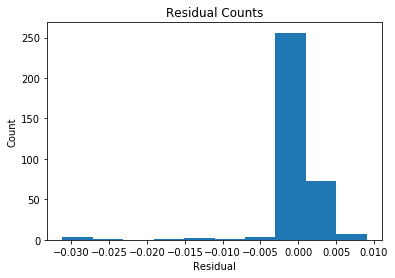

In [34]:
predicted = regr.predict(X_one).ravel()
actual= features_new['Property_crime_per_capita']

residual = actual - predicted

plt.hist(residual)
plt.title('Residual Counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

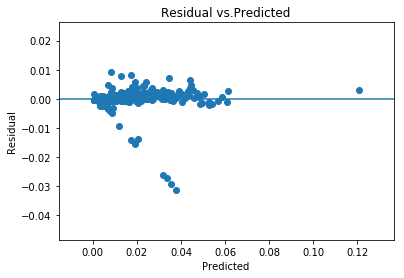

In [35]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs.Predicted')
plt.show()

In [36]:
r2_score(actual, predicted)

0.930373621310551

In [37]:
correlation_matrix = X_one.corr()
display(correlation_matrix)

,Larceny_per_capita,Buglary_per_capita,Violent_crime_per_capita
Larceny_per_capita,1.000000,0.567194,0.302314
Buglary_per_capita,0.567194,1.000000,0.681289
Violent_crime_per_capita,0.302314,0.681289,1.000000


In [38]:
linear_formula = 'Property_crime_per_capita ~ Larceny_per_capita+Buglary_per_capita + Violent_crime_per_capita' 

lm_new = smf.ols(formula=linear_formula, data = features_new).fit()

In [39]:
print(lm_new.summary())

                                OLS Regression Results                               
Dep. Variable:     Property_crime_per_capita   R-squared:                       0.930
Model:                                   OLS   Adj. R-squared:                  0.930
Method:                        Least Squares   F-statistic:                     1532.
Date:                       Thu, 07 Jun 2018   Prob (F-statistic):          1.30e-198
Time:                               10:41:13   Log-Likelihood:                 1449.8
No. Observations:                        348   AIC:                            -2892.
Df Residuals:                            344   BIC:                            -2876.
Df Model:                                  3                                         
Covariance Type:                   nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [40]:
lm_new.params

Intercept                   0.000393
Larceny_per_capita          1.047484
Buglary_per_capita          0.936158
Violent_crime_per_capita   -0.961590
dtype: float64

In [41]:
lm_new.pvalues

Intercept                    2.370293e-01
Larceny_per_capita          1.631472e-162
Buglary_per_capita           5.196809e-15
Violent_crime_per_capita     3.675549e-10
dtype: float64

In [42]:
lm_new.rsquared

0.930373621310551

In [43]:
lm_new.conf_int()

,0,1
Intercept,-0.000259,0.001044
Larceny_per_capita,1.007103,1.087866
Buglary_per_capita,0.711320,1.160996
Violent_crime_per_capita,-1.254577,-0.668603


In [44]:
cross_val_score(regr, X_one, Y_one, cv=10)

array([0.97838101, 0.98677633, 0.91013262, 0.79701696, 0.87842161,
       0.90183278, 0.99059443, 0.96459141, 0.98003892, 0.78153843])

# NY 2014(different year)

## Cleaning the Data

In [45]:
new_table = pd.read_csv(r'C:\Users\owner\projects\table_8_2014.csv', encoding='ISO-8859-1')

In [46]:
new_table.head()

,Table 8,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NEW YORK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Offenses Known to Law Enforcement,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"by City, 2014",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape\n(revised\ndefinition)1,Rape\n(legacy\ndefinition)2,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson3,NaN
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN


In [47]:
ny_2014 = new_table.drop([0, 1, 2, 3])
ny_2014.columns = ['City', 'Population', 'Violent_crime', 'Murder and nonnegligent manslaughter', 'Rape(revised definition)', 'Rape','Robbery', 'Aggrevated_assault', 'Property_crime', 'Buglary', 'Larceny_theft', 'Motor-vehicle theft', 'Arson', 'blank']

In [48]:
ny_2014.head()

,City,Population,Violent_crime,Murder and nonnegligent manslaughter,Rape(revised definition),Rape,Robbery,Aggrevated_assault,Property_crime,Buglary,Larceny_theft,Motor-vehicle theft,Arson,blank
4,Adams Village,"1,851",0,0,NaN,0,0,0,11,1,10,0,0,NaN
5,Addison Town and Village,"2,568",2,0,NaN,0,1,1,49,1,47,1,0,NaN
6,Afton Village4,820,0,0,0,NaN,0,0,1,0,1,0,0,NaN
7,Akron Village,"2,842",1,0,NaN,0,0,1,17,0,17,0,0,NaN
8,Albany4,"98,595",802,8,54,NaN,237,503,"3,888",683,"3,083",122,12,NaN


In [49]:
ny_2014= ny_2014.drop(columns = ['blank'])

In [50]:
#np.unique(cali['Rape(revised definition)'])
ny_2014= ny_2014.drop(columns = ['Rape(revised definition)'])

In [51]:
ny_2014['Violent_crime'] = pd.to_numeric(ny_2014['Violent_crime'], errors='coerce')
ny_2014['Property_crime'] = pd.to_numeric(ny_2014['Property_crime'], errors='coerce')
ny_2014['Larceny_theft'] = pd.to_numeric(ny_2014['Larceny_theft'], errors='coerce')
ny_2014['Population'] = pd.to_numeric(ny_2014['Population'], errors='coerce')
ny_2014['Buglary'] = pd.to_numeric(ny_2014['Buglary'], errors='coerce')

In [52]:
#ny_2014['Larceny_theft_sqrt'] = (ny_2014['Larceny_theft']+1) **0.5
#ny_2014['Violent_crime_sqrt'] = (ny_2014['Violent_crime'] +1) **0.5
#ny_2014['Population_sqrt'] = (ny_2014['Population'] +1) **0.5

## Creation of New Features

In [53]:
ny_2014['Property_crime_per_capita'] = ny_2014['Property_crime'] /ny_2014['Population']
ny_2014['Larceny_per_capita'] = ny_2014['Larceny_theft'] / ny_2014['Population']
ny_2014['Buglary_per_capita'] = ny_2014['Buglary'] / ny_2014['Population']
ny_2014['Violent_crime_per_capita'] = ny_2014['Violent_crime'] / ny_2014['Population']

In [54]:
ny_2014['Larceny_per_capita'].fillna(ny_2014['Larceny_per_capita'].median(), inplace = True)
ny_2014['Property_crime_per_capita'].fillna(ny_2014['Property_crime_per_capita'].median(), inplace = True)
ny_2014['Violent_crime_per_capita'].fillna(ny_2014['Violent_crime_per_capita'].median(), inplace = True)
ny_2014['Buglary_per_capita'].fillna(ny_2014['Buglary_per_capita'].median(), inplace = True)

In [55]:
X_ny_2014 = ny_2014[['Larceny_per_capita', 'Buglary_per_capita', 'Violent_crime_per_capita']]
prediction = regr.predict(X_ny_2014)
Y_ny_2014 = ny_2014[['Property_crime_per_capita']]

In [56]:
print(r2_score(Y_ny_2014, prediction))

0.9974937641655844


In [57]:
f_regression(X_ny_2014, Y_ny_2014)

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([4.76671617e+05, 7.32181310e+03, 1.12966699e-02]),
 array([0.00000000e+000, 1.05528270e-247, 9.15412588e-001]))